In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !pip install keras-tuner --upgrade

# import keras_tuner
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, TimeDistributed, Activation


In [4]:
# Read data from CSV file (assuming 'word' and 'lemma' columns)
df = pd.read_csv('/content/drive/MyDrive/FYP/shuffle_merged_data.csv')

word_to_lemma = list(zip(df['Word'], df['Lemma']))

print(word_to_lemma)

train_set, test_set = train_test_split(word_to_lemma,
                                       test_size=0.2,
                                       random_state=42)
print(len(train_set), len(test_set))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [5]:
words = [n for (n, l) in train_set] ## X
lemmas = [l for (n, l) in train_set] ## y

In [6]:
print(words)

['کنبوانی', 'سدواویں', 'پرجناؤں', 'دهنيسو', 'اٹھایں', 'قينچیو', 'جتاتا', 'پڑھاندی', 'روگیا', 'لوٹیو', 'میچھنے', 'تصویریں', 'قاطع', 'سرکنڈے', 'پڑھاکواں', 'شرٹاں', 'چوسانے', 'ہنکارتے', 'ایراوتی', 'اینٹھانا', 'مورکھنا', 'چَھٹئے', 'چھکوا', 'پہچانا', 'چوواویو', 'نسترنیں', 'بندهوائی', 'پھددے', 'ساعتوں', 'میچیں', 'افسانویتیں', 'مسلواؤ', 'ڈھگائیں', 'لپٹاتا', 'بھڑکوادا', 'رولتا', 'سٹویا', 'سالپرنی', 'کمیزو', 'چپیکوں', 'نکیائیے', 'کوششو', 'بيڑیاں', 'مچاندیاں', 'پٹهانی', 'دھڑکاوٗ', 'منتیں', 'اُڈا', 'چمنیو', 'قاشروں', 'پگھلوا', 'تاپنے', 'ٹوٹیے', 'الٹاندی', 'ننگیانے', 'سرکو', 'فیلڈنگاں', 'شناختتوں', 'کهرکهرا', 'لاتی', 'گاجراں', 'تریکھا', 'بہادا', 'فسادات', 'ٹوردا', 'جیوندے', 'جارورییں', 'صلہئیں', 'چھیپا', 'بھکوسا', 'ٹھنگیاتا', 'وگوانیاں', 'نکلواوندے', 'ٹوٹاوندی', 'سٹانی', 'پھسلاوندیاں', 'پرتعیشاں', 'پاندریوں', 'کانپتے', 'روکھانا', 'سہلائے', 'پھکاوندیاں', 'کھپاں', 'سرمایے', 'ٹھاراں', 'چڑواویا', 'چارمنگیو', 'پروٹھیاں', 'رکھوا', 'ناچا', 'بیویاں', 'تیز', 'جھلایں', 'کہوٗ', 'کرکٹ', 'چھوٹادی', 'تیکھاوے', 

In [7]:
print(lemmas)

['کنبوا', 'سدوا', 'پرجنا', 'دهنيس', 'اٹھا', 'قينچی', 'جتا', 'پڑھا', 'روگ', 'لوٹ', 'میچھ', 'تصویر', 'قاطع', 'سرکنڈا', 'پڑھاکو', 'شرٹ', 'چوسا', 'ہنکار', 'ایراوت', 'اینٹھا', 'مورکھ', 'چَھٹ', 'چھکوا', 'پہچان', 'چووا', 'نسترن', 'بندهوا', 'پھد', 'ساعت', 'میچ', 'افسانویت', 'مسلوا', 'ڈھگا', 'لپٹا', 'بھڑکوا', 'رول', 'سٹ', 'سالپرنی', 'کمیز', 'چپیک', 'نکیا', 'کوشش', 'بيڑی', 'مچا', 'پٹهان', 'دھڑکا', 'من', 'اُڈا', 'چمنی', 'قاشر', 'پگھلوا', 'تاپ', 'ٹوٹی', 'الٹا', 'ننگیا', 'سرک', 'فیلڈنگ', 'شناخت', 'کهرکهرا', 'لا', 'گاجر', 'تریکھا', 'بہا', 'فساد', 'ٹور', 'جیوندا', 'جاروری', 'صلہ', 'چھیپ', 'بھکوس', 'ٹھنگیا', 'وگوا', 'نکلوا', 'ٹوٹا', 'سٹا', 'پھسلا', 'پرتعیش', 'پاندری', 'کانپ', 'روکھا', 'سہلا', 'پھکا', 'کھپ', 'سرمایہ', 'ٹھار', 'چڑوا', 'چارمنگی', 'پروٹھا', 'رکھوا', 'ناچ', 'بیوی', 'تیز', 'جھلا', 'کہ', 'کرکٹ', 'چھوٹا', 'تیکھا', 'وگھڑوا', 'اٹک', 'تریکھی', 'ٹهری', 'مطابقت', 'ڈھونڈ', 'مینجر', 'مٹھا', 'امبر', 'لگا', 'سٹوری', 'پھُل', 'پوس', 'صدارتی', 'نوکیلہ', 'جھس', 'اوج', 'نیا', 'پجر', 'اکسا', 'ولا', 'ڈنڈی', 

In [8]:
import pandas as pd

# Assuming your dataset is stored in a pandas DataFrame called 'df'
# Replace 'df' with your DataFrame name if it's different

def check_float_in_dataset(df):
    # Check 'Lemma' column for floats
    lemma_floats = any(isinstance(value, float) for value in df['Lemma'])

    # Check 'Word' column for floats
    word_floats = any(isinstance(value, float) for value in df['Word'])

    return lemma_floats or word_floats

# Usage example:
# If your DataFrame is named 'dataset', you can call the function like this:
result = check_float_in_dataset(df)
print(result)  # This will print True if there are floats, False otherwise


False


In [9]:
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(words)
tokenizer.fit_on_texts(lemmas)

In [10]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)

Vocabulary Size: 74


In [11]:
tokenizer.word_index

{'ا': 1,
 'و': 2,
 'ی': 3,
 'ن': 4,
 'ر': 5,
 'ک': 6,
 'ل': 7,
 'ھ': 8,
 'ت': 9,
 'د': 10,
 'م': 11,
 'س': 12,
 'ب': 13,
 'ں': 14,
 'پ': 15,
 'ٹ': 16,
 'چ': 17,
 'گ': 18,
 'ج': 19,
 'ہ': 20,
 'ے': 21,
 'ڑ': 22,
 'ه': 23,
 'ئ': 24,
 'ڈ': 25,
 'ي': 26,
 'ش': 27,
 'ف': 28,
 'ق': 29,
 'ُ': 30,
 'ح': 31,
 'خ': 32,
 'ع': 33,
 'ز': 34,
 'ص': 35,
 ' ': 36,
 'ط': 37,
 'ِ': 38,
 'آ': 39,
 'ؤ': 40,
 'غ': 41,
 'ض': 42,
 'َ': 43,
 'ث': 44,
 'ٗ': 45,
 'ذ': 46,
 'ظ': 47,
 '-': 48,
 'ً': 49,
 'ء': 50,
 'ٔ': 51,
 'ّ': 52,
 'ٰ': 53,
 '/': 54,
 'ژ': 55,
 'ۓ': 56,
 'ؔ': 57,
 'ۃ': 58,
 '،': 59,
 'a': 60,
 'e': 61,
 '۔': 62,
 's': 63,
 'u': 64,
 'r': 65,
 'f': 66,
 'c': 67,
 'n': 68,
 'm': 69,
 '1': 70,
 '4': 71,
 '6': 72,
 '5': 73}

In [12]:
words_ints = tokenizer.texts_to_sequences(words)
lemmas_ints = tokenizer.texts_to_sequences(lemmas)


In [13]:
print(words[:5])
print(words_ints[:5])
print(lemmas[:5])
print(lemmas_ints[:5])

['کنبوانی', 'سدواویں', 'پرجناؤں', 'دهنيسو', 'اٹھایں']
[[6, 4, 13, 2, 1, 4, 3], [12, 10, 2, 1, 2, 3, 14], [15, 5, 19, 4, 1, 40, 14], [10, 23, 4, 26, 12, 2], [1, 16, 8, 1, 3, 14]]
['کنبوا', 'سدوا', 'پرجنا', 'دهنيس', 'اٹھا']
[[6, 4, 13, 2, 1], [12, 10, 2, 1], [15, 5, 19, 4, 1], [10, 23, 4, 26, 12], [1, 16, 8, 1]]


اسلام آبادیوندیاں


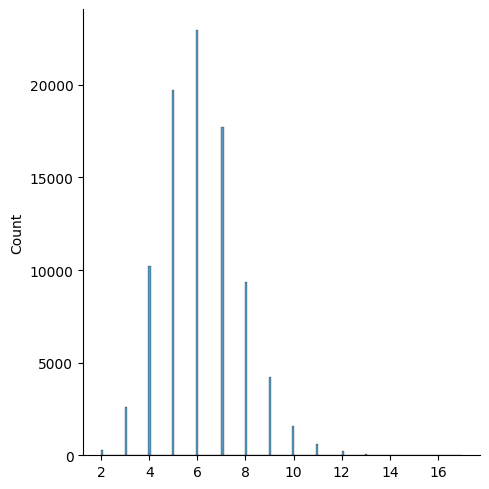

In [14]:
import seaborn as sns
import numpy as np

## We can check the length distribution of texts in corpus

words_lens = [len(n) for n in words_ints]
words_lens

sns.displot(words_lens)
print(words[np.argmax(words_lens)])  # longest name

In [15]:
max_len = max(len(seq) for seq in words_ints)
print('Maximum Sequence Length:', max_len)

Maximum Sequence Length: 17


In [16]:
words_ints_pad = sequence.pad_sequences(words_ints, maxlen=max_len,padding='post')
words_ints_pad[:10]

array([[ 6,  4, 13,  2,  1,  4,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [12, 10,  2,  1,  2,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15,  5, 19,  4,  1, 40, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10, 23,  4, 26, 12,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 1, 16,  8,  1,  3, 14,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [29, 26,  4, 17,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [19,  9,  1,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15, 22,  8,  1,  4, 10,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 5,  2, 18,  3,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 7,  2, 16,  3,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [17]:
lemmas_ints_pad = sequence.pad_sequences(lemmas_ints, maxlen=max_len,padding='post')
lemmas_ints_pad[:10]

array([[ 6,  4, 13,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [12, 10,  2,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15,  5, 19,  4,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [10, 23,  4, 26, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 1, 16,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [29, 26,  4, 17,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [19,  9,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [15, 22,  8,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 5,  2, 18,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0],
       [ 7,  2, 16,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [18]:
## training data

X_train = np.array(words_ints_pad).astype('int32')
y_train = np.array(lemmas_ints_pad).astype('int32')

# ## testing data
# X_test_texts = [n for (n, l) in test_set]
# Y_test_texts = [l for (n, l) in test_set]
# X_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(X_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')
# y_test = np.array(
#     sequence.pad_sequences(tokenizer.texts_to_sequences(Y_test_texts),
#                            maxlen=max_len, padding='post')).astype('int32')

In [19]:
print(X_train.shape)
print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

(89648, 17)
(89648, 17)


In [20]:
words_matrix = tokenizer.texts_to_matrix(words, mode="binary")
print(words_matrix.shape)

(89648, 74)


In [21]:
lemmas_matrix = tokenizer.texts_to_matrix(lemmas, mode="binary")
print(lemmas_matrix.shape)

(89648, 74)


In [22]:
# print(X_test)

In [23]:
print(test_set)

[('کھلرو', 'کھلر'), ('اصولیوں', 'اصول'), ('پھڑیچوائیں', 'پھڑیچوا'), ('گدهیو', 'گدهی'), ('حلدا', 'حل'), ('دنگے', 'دنگہ'), ('چڑدے', 'چڑ'), ('پکڑان', 'پکڑا'), ('زریعیو ', 'زریعہ'), ('پيشاب', 'پيشاب'), ('لیپا', 'لیپ'), ('مرواوئیے', 'مروا'), ('شرابیندی', 'شرابی'), ('گندی', 'گن'), ('بخشاوئیے', 'بخشا'), ('چپڑیں', 'چپڑ'), ('بچنا', 'بچ'), ('استباحی', 'استباح'), ('سیواویو', 'سیوا'), ('منڈیروں', 'منڈیر'), ('پھکاروں', 'پھکار'), ('مکينو', 'مکين'), ('سنبھل', 'سنبھل'), ('لہراویا', 'لہرا'), ('مہمانئیے', 'مہمان'), ('مذکورہاں', 'مذکورہ'), ('توڑنے', 'توڑ'), ('چھنی', 'چھن'), ('پھلانگو', 'پھلانگ'), ('چهوڑوں', 'چهوڑ'), ('المثلوں', 'المثل'), ('چاردیواریاں', 'چاردیواری'), ('مڑوانا', 'مڑوا'), ('برستی', 'برس'), ('فیشنا', 'فیشن'), ('گلاس', 'گلاس'), ('جڑوانی', 'جڑوا'), ('ہنکارے', 'ہنکارے'), ('دشمناں', 'دشمن'), ('بجا', 'بجا'), ('امریکی', 'امریکی'), ('رگڑوادیاں', 'رگڑوا'), ('جانی', 'جانی'), ('امتزاجی', 'امتزاج'), ('سوٹادا', 'سوٹا'), ('خورابی', 'خوراب'), ('ڈاکٹرو', 'ڈاکٹر'), ('مانگواون', 'مانگوا'), ('پلتیں', 'پل'), 

In [24]:
print(words[2])
print(words_matrix[2,:])

پرجناؤں
[0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [25]:
print(lemmas[2])
print(lemmas_matrix[2,:])

پرجنا
[0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [26]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len))
model.add(LSTM(units=64, return_sequences=True))  # Ensure LSTM outputs sequences
model.add(TimeDistributed(Dense(vocab_size, activation='softmax')))  # TimeDistributed for sequence prediction

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [27]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128)

Epoch 1/10
701/701 [==============================] - 13s 9ms/step - loss: 0.7999 - accuracy: 0.8285
Epoch 2/10
701/701 [==============================] - 4s 6ms/step - loss: 0.1120 - accuracy: 0.9674
Epoch 3/10
701/701 [==============================] - 5s 7ms/step - loss: 0.0809 - accuracy: 0.9730
Epoch 4/10
701/701 [==============================] - 4s 6ms/step - loss: 0.0742 - accuracy: 0.9748
Epoch 5/10
701/701 [==============================] - 4s 6ms/step - loss: 0.0701 - accuracy: 0.9762
Epoch 6/10
701/701 [==============================] - 4s 6ms/step - loss: 0.0671 - accuracy: 0.9774
Epoch 7/10
701/701 [==============================] - 5s 7ms/step - loss: 0.0645 - accuracy: 0.9783
Epoch 8/10
701/701 [==============================] - 4s 6ms/step - loss: 0.0622 - accuracy: 0.9793
Epoch 9/10
701/701 [==============================] - 4s 5ms/step - loss: 0.0602 - accuracy: 0.9801
Epoch 10/10
701/701 [==============================] - 5s 7ms/step - loss: 0.0584 - accuracy: 0.980

In [28]:
from keras.models import load_model

# Assuming 'model' is your trained model
# Save the model to a file
model.save('my_model.keras')

# Print a success message
print("Model saved successfully as 'my_model.keras'")

Model saved successfully as 'my_model.keras'


In [29]:
import pickle
# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [30]:
from keras.models import load_model
def predict_lemma(word, tokenizer, max_len):

  with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

  # Convert the word to a sequence of integers
  sequence = tokenizer.texts_to_sequences([word])

  # Pad the sequence to the maximum length
  padded_sequence = pad_sequences(sequence, maxlen=max_len,padding='post')

  model = load_model('my_model.keras')

  # Predict the lemma using the trained model
  predictions = model.predict(padded_sequence)

  # Convert the prediction to the corresponding lemma
  # Since the output is a sequence, we need to take the argmax for each timestep
  lemma_sequence = np.argmax(predictions, axis=-1)[0]

  # Retrieve the corresponding lemma from the tokenizer's index_word dictionary
  lemma = ''.join([tokenizer.index_word.get(i, '') for i in lemma_sequence if i != 0])

  return lemma

In [31]:
# Example usage (Actuall lemma = ڈھگا):
word = 'ڈھگائیں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 408ms/step
The predicted lemma for ڈھگائیں is: ڈھگا


In [32]:
# Example usage (Actuall lemma = ڈراونہ):
word = 'ڈراونہیو'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 358ms/step
The predicted lemma for ڈراونہیو is: ڈراونہ


In [33]:
# Example usage (Actuall lemma = 'تگڑا'):
word = 'تگڑادا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 344ms/step
The predicted lemma for تگڑادا is: تگڑا


In [34]:
# Example usage (Actuall lemma = 'ودا'):
word = 'وداندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 509ms/step
The predicted lemma for وداندیاں is: ودا


In [35]:
# Example usage (Actuall lemma = 'چھڈوا'):
word = 'چھڈواوئیے'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 701ms/step
The predicted lemma for چھڈواوئیے is: چھڈوا


In [36]:
# Example usage (Actuall lemma = چوندهيا):
word = 'چوندهيانا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 354ms/step
The predicted lemma for چوندهيانا is: چوندهيا


In [37]:
# Example usage (Actuall lemma = 'مچوا'):
word = 'مچواندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 342ms/step
The predicted lemma for مچواندیاں is: مچوا


In [38]:
# Example usage (Actuall lemma ='جھپٹوا'):
word = 'جھپٹواوندیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 341ms/step
The predicted lemma for جھپٹواوندیاں is: جھپٹا


In [39]:
# Example usage (Actuall lemma ='اُگال''):
word = 'اُگالن'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 334ms/step
The predicted lemma for اُگالن is: اُگال


In [40]:
# Example usage (Actuall lemma = جھجک):
word = 'جھجکوں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 363ms/step
The predicted lemma for جھجکوں is: جھجک


In [41]:
# Example usage (Actuall lemma = پهنسوا):
word = 'پهنسوائیو'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 531ms/step
The predicted lemma for پهنسوائیو is: پهنسوا


In [42]:
# Example usage (Actuall lemma = خانسامن):
word = 'خانسامنوں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 371ms/step
The predicted lemma for خانسامنوں is: خانسامن


In [43]:
# Example usage (Actuall lemma = جہان):
word = 'جہانیاں'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 368ms/step
The predicted lemma for جہانیاں is: جہانی


In [44]:
# Example usage (Actuall lemma = کهيوٹ):
word = 'کهيوٹو'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 556ms/step
The predicted lemma for کهيوٹو is: کهيوٹ


In [45]:
# Example usage (Actuall lemma = چوندهيا):
word = 'چوندهيانا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 335ms/step
The predicted lemma for چوندهيانا is: چوندهيا


In [46]:
# Example usage (Actuall lemma = ہو):
word = 'ہونا'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 0s 361ms/step
The predicted lemma for ہونا is: ہونا


In [64]:
# Example usage (Actuall lemma = کتروا):
word = 'کترواندی'
predicted_lemma = predict_lemma(word, tokenizer, max_len)
print(f"The predicted lemma for {word} is: {predicted_lemma}")

1/1 [==============================] - 1s 532ms/step
The predicted lemma for کترواندی is: کتروا


In [ ]:
from IPython import get_ipython
get_ipython().magic('reset -sf')